In [183]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [184]:
from google.colab import files

uploaded = files.upload()

Saving Vaccine_State.csv to Vaccine_State.csv


In [186]:
df = pd.read_csv('Vaccine_State.csv')

### Describing data

In [210]:
df.head()

,States,First_Dose,Second_Dose,net
0,Andaman Nico.,294001,200157,93844
1,Andhra P.,32976969,20375181,12601788
2,Arunachal P.,771875,534486,237389
3,Assam,20172463,8068795,12103668
4,Bihar,49874828,18346781,31528047


In [211]:
df.tail()

,States,First_Dose,Second_Dose,net
31,Telangana,22498559,9772398,12726161
32,Tripura,2508477,1621329,887148
33,Uttar Pradesh,98178865,32681895,65496970
34,Uttarakhand,7478017,3898342,3579675
35,West Bengal,56192166,21559747,34632419


In [213]:
df.describe

<bound method NDFrame.describe of                States  First_Dose  Second_Dose       net
0       Andaman Nico.      294001       200157     93844
1           Andhra P.    32976969     20375181  12601788
2        Arunachal P.      771875       534486    237389
3               Assam    20172463      8068795  12103668
4               Bihar    49874828     18346781  31528047
5          Chandigarh      926035       546981    379054
6        Chhattisgarh    14851682      7343273   7508409
7            DNH & DD      660753       370255    290498
8               Delhi    13055636      7425404   5630232
9                 Goa     1262568       911114    351454
10            Gujarat    44735217     25972387  18762830
11            Haryana    17772376      8115463   9656913
12   Himachal Pradesh     5713695      3443823   2269872
13  Jammu And Kashmir     9511073      5149471   4361602
14          Jharkhand    14986646      5585648   9400998
15          Karnataka    42497761     22858384  196393

In [212]:
df.dtypes

States         object
First_Dose      int64
Second_Dose     int64
net             int64
dtype: object

### Visualization of Vaccine Dose 1 and 2 ;State Wise

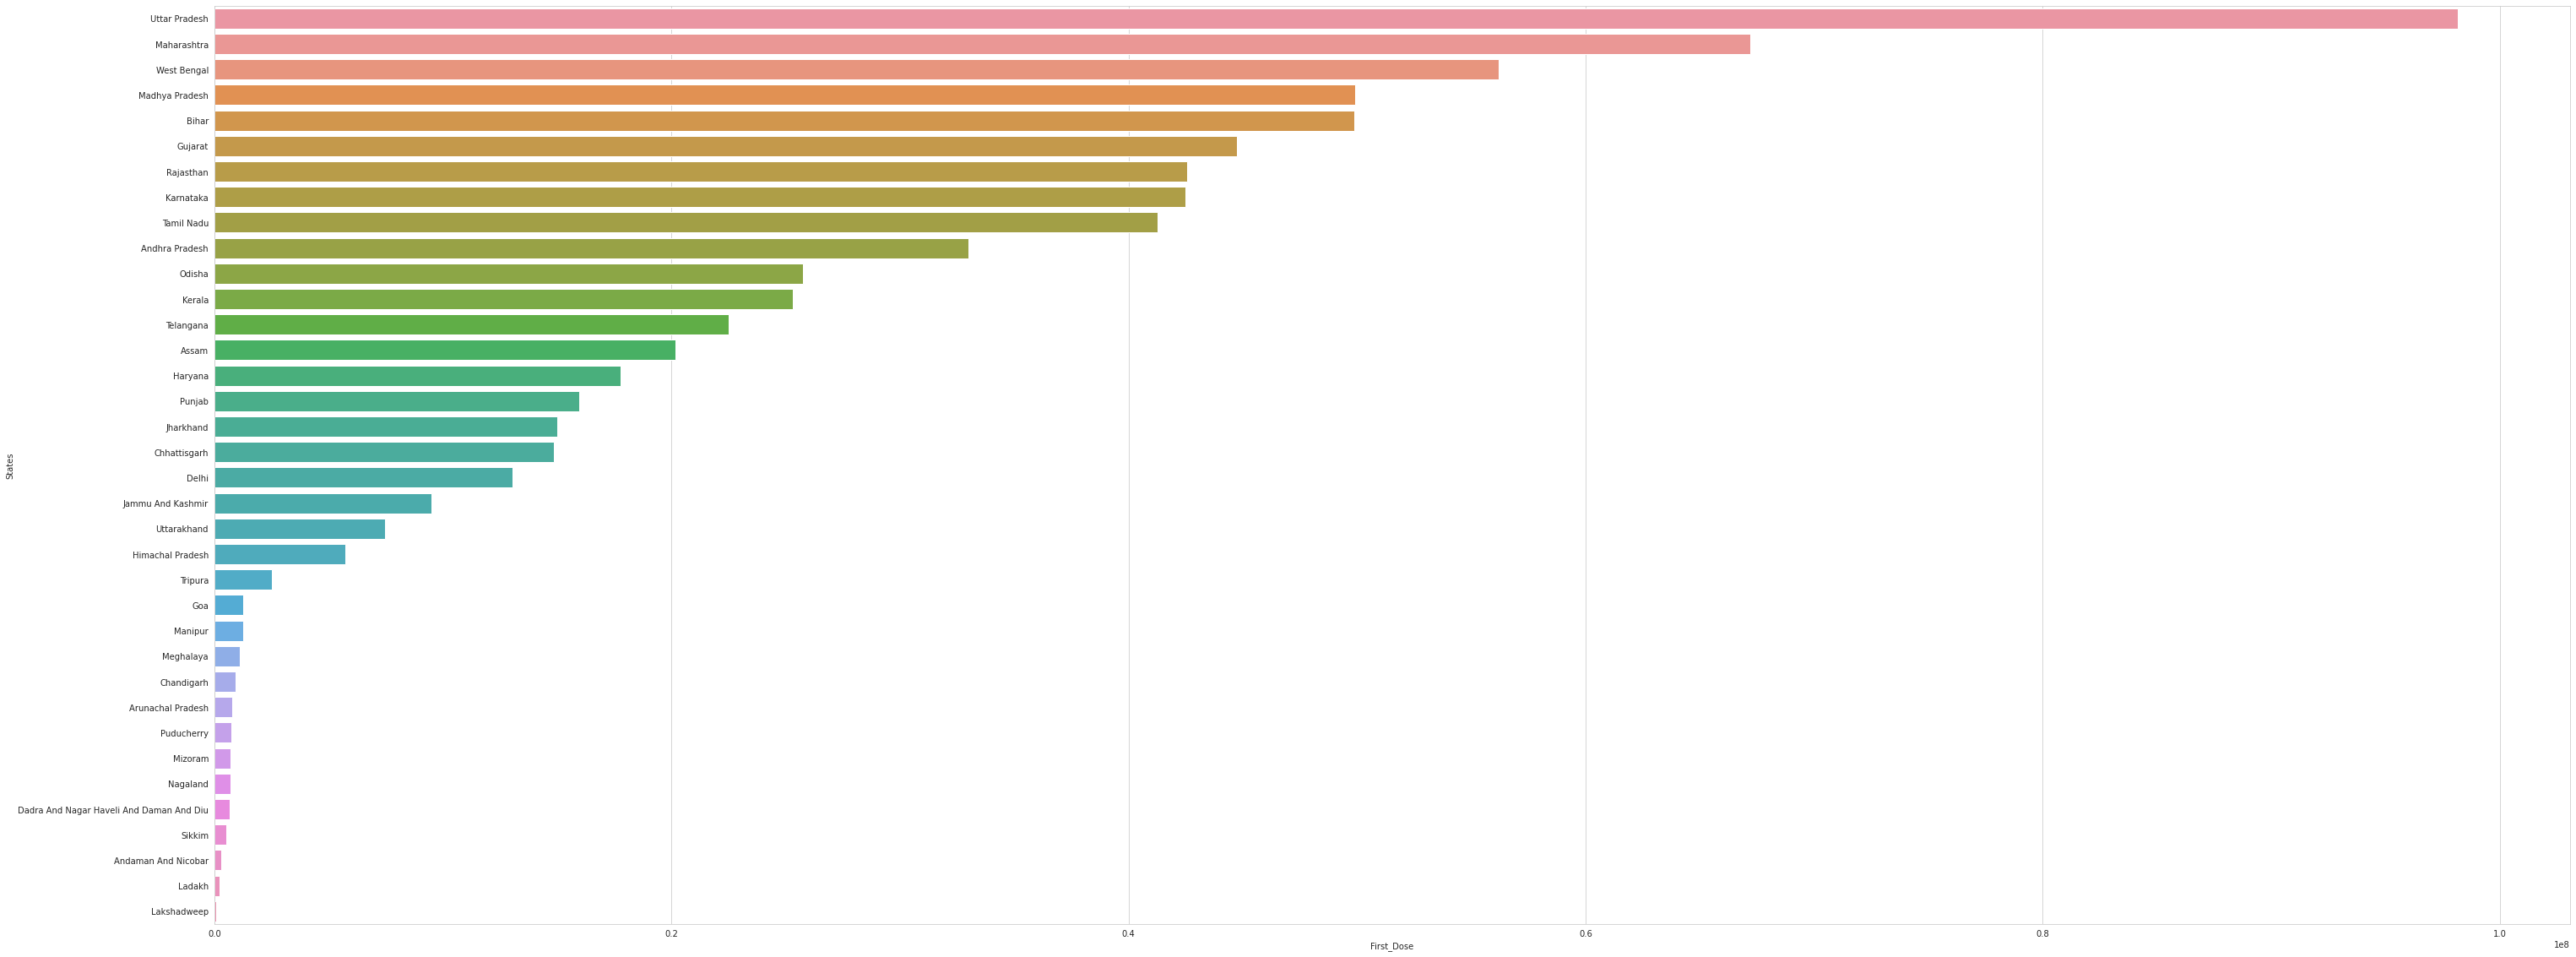

In [190]:

fig, ax = plt.subplots(figsize = (50,20))
ax = sns.barplot(x="First_Dose", y="States",orient= "h",data=df.sort_values("First_Dose",ascending=False)) 

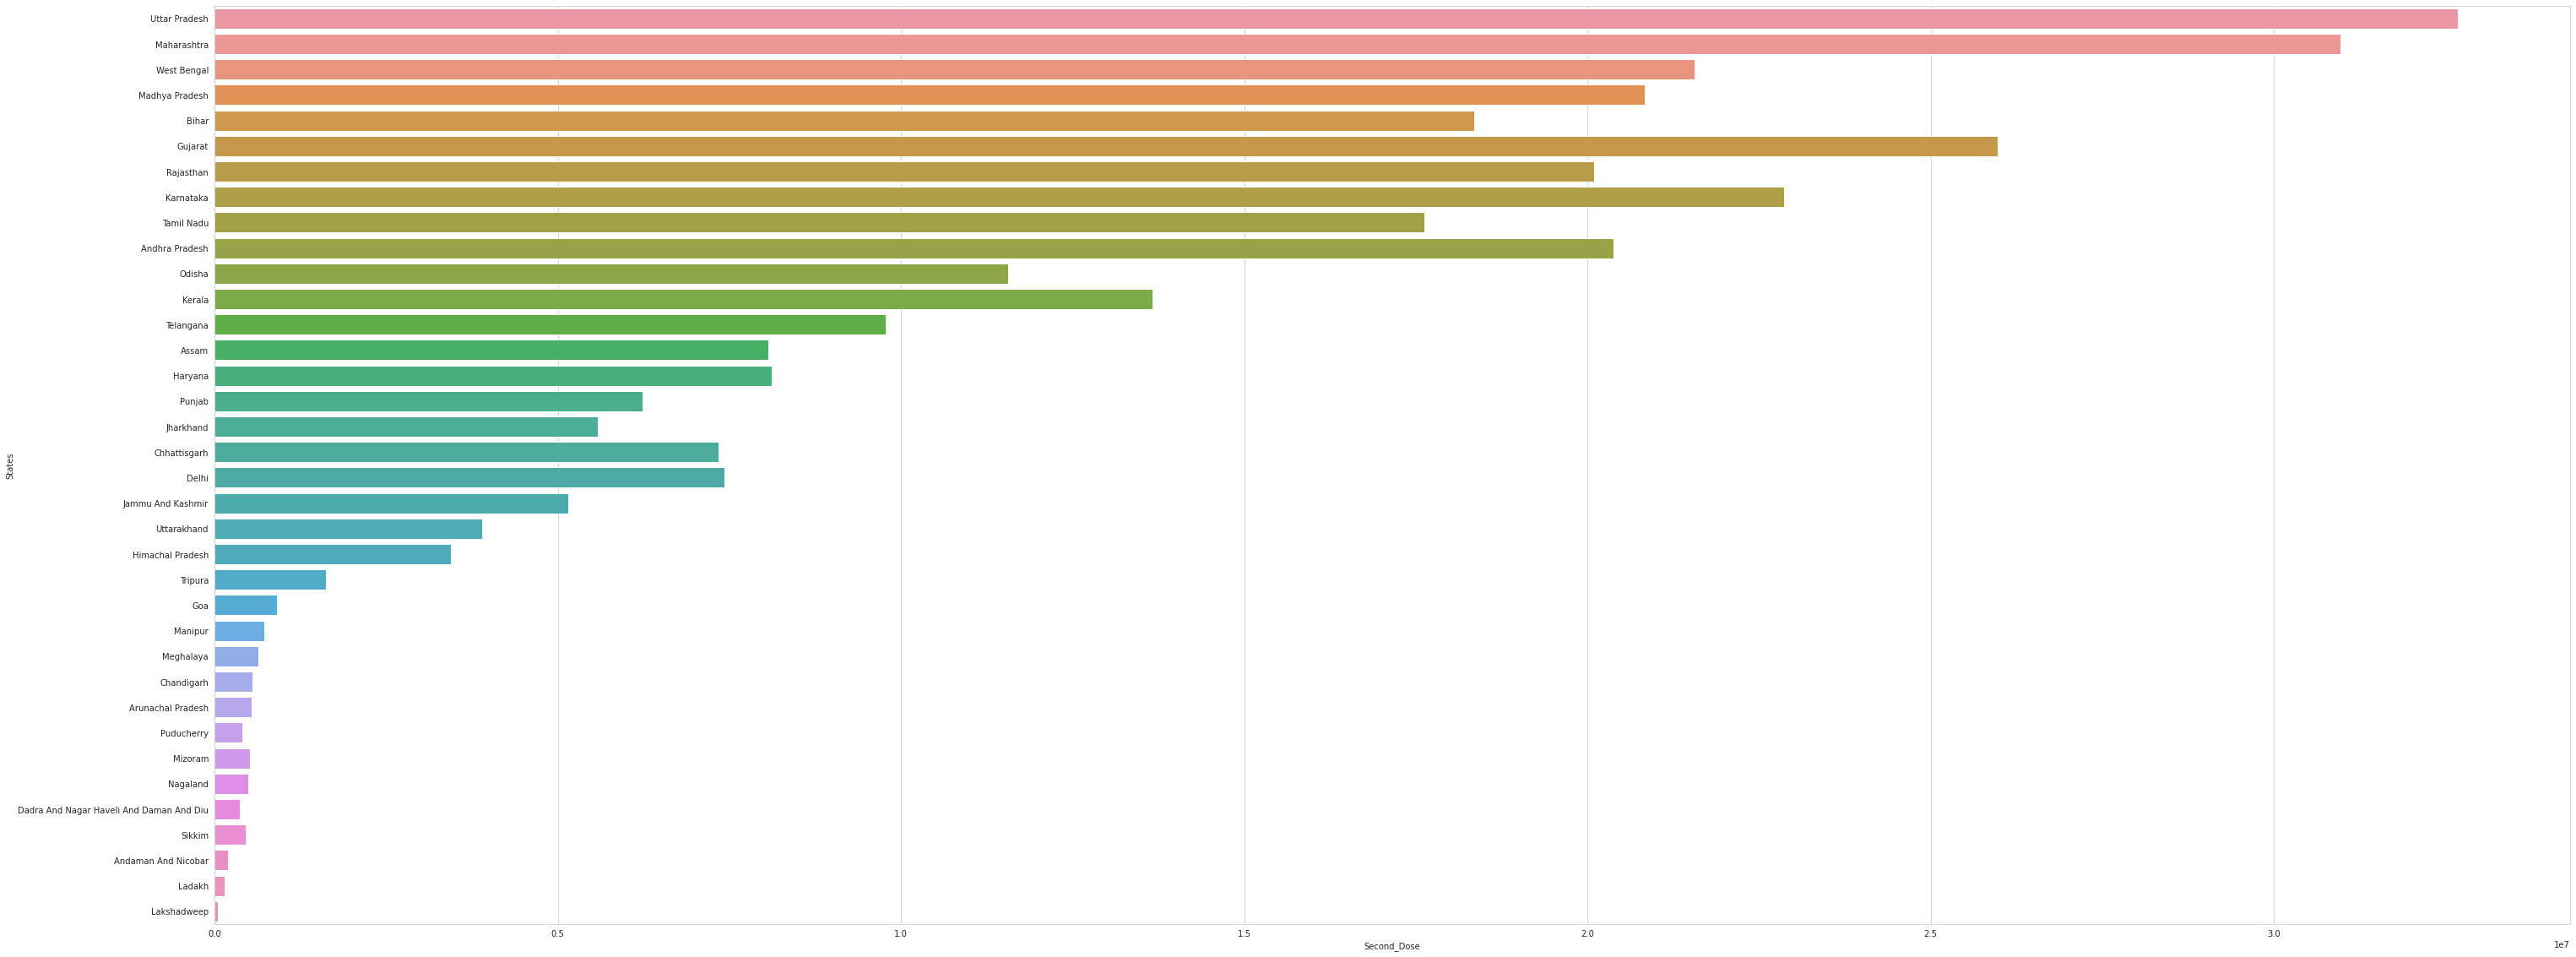

In [191]:

fig, ax = plt.subplots(figsize = (50,20))
ax = sns.barplot(x="Second_Dose", y="States",orient= "h",data=df.sort_values("First_Dose",ascending=False)) 

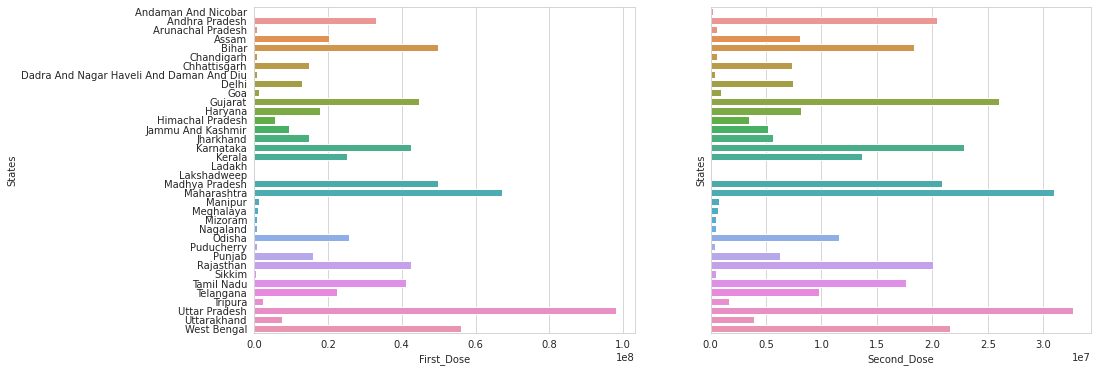

In [193]:

fig4, ax4 = plt.subplots(1, 2,sharey="row",figsize=(15,6))

sns.barplot(x="First_Dose", y="States", data=df,ax=ax4[0])
sns.barplot(x="Second_Dose", y="States", data=df,ax=ax4[1])





'# Add a legend and informative axis label\nax2.legend(ncol=2, loc="lower right", frameon=True)\nax2.set(xlim=(0, 24), ylabel="",\n       xlabel="Second_Dose")\nsns.despine(left=True, bottom=True)'

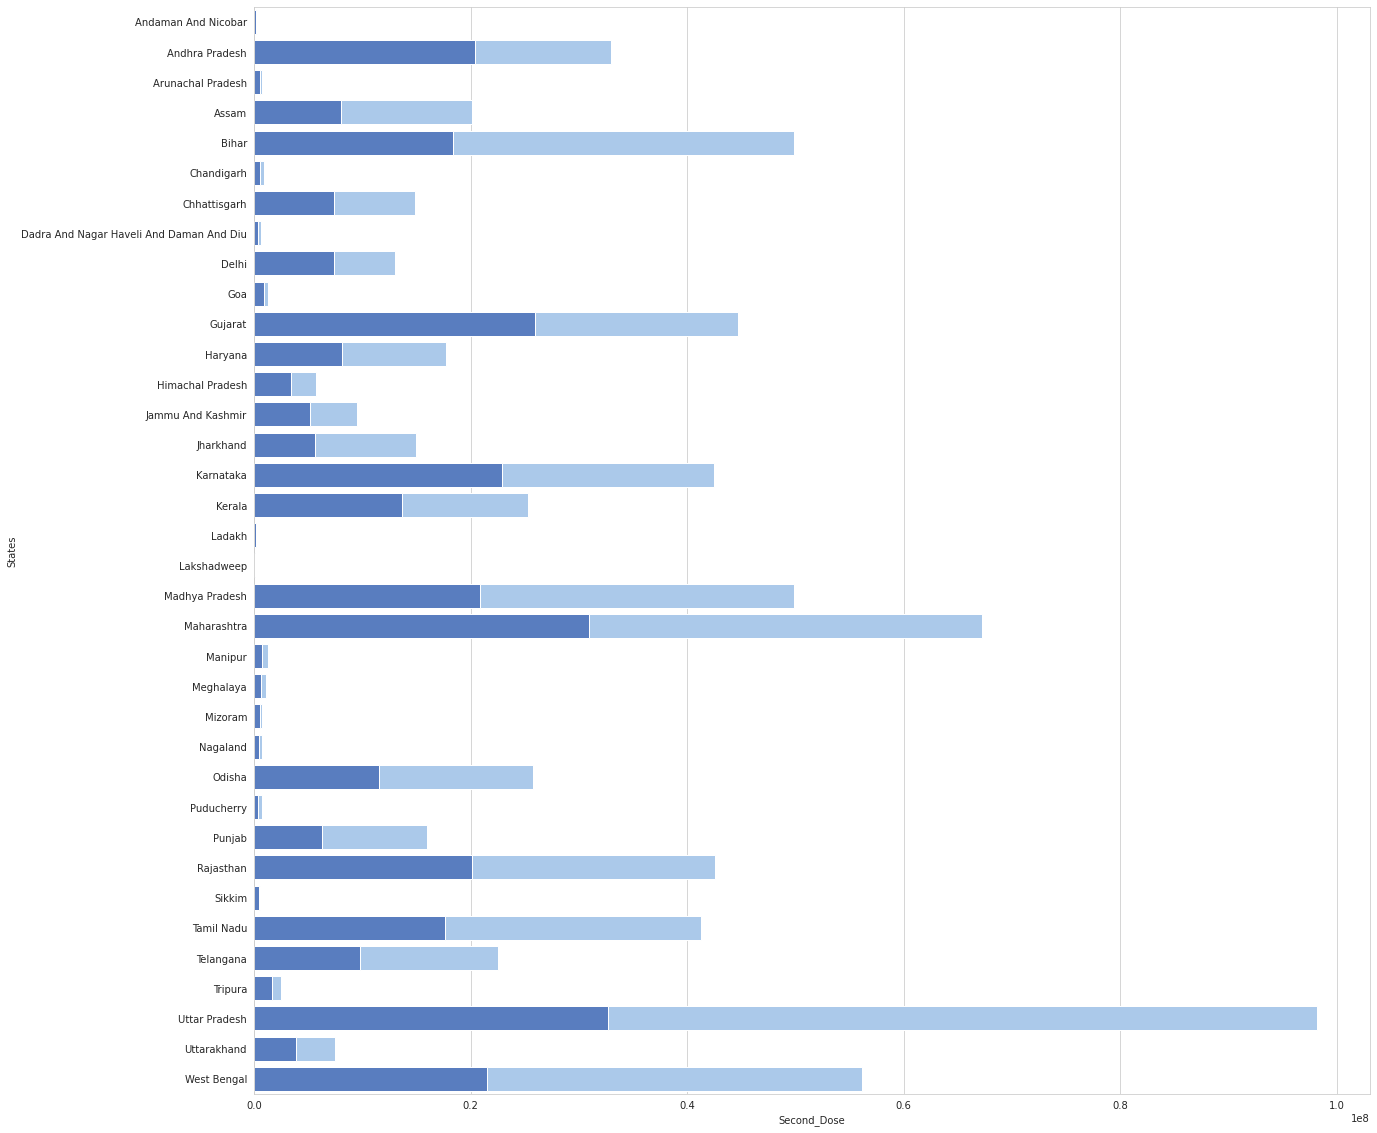

In [195]:

fig4, ax = plt.subplots(1,sharey="row",figsize=(20,20))
sns.set_color_codes("pastel")
sns.barplot(x="First_Dose", y="States", data=df,
            label="Dose 1", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Second_Dose", y="States", data=df,
            label="First_Dose", color="b")



The above Plot shows the gap between First and Second Dose by each State

*Lets Rename some Big lettered States so that their label description is visible when the state data is plotted in X-axis*

In [214]:
df.loc[7, 'States'] = "DNH & DD"
df.loc[1, 'States'] = "Andhra P."
df.loc[2, 'States'] = "Arunachal P."
df.loc[0, 'States'] = "Andaman Nico."

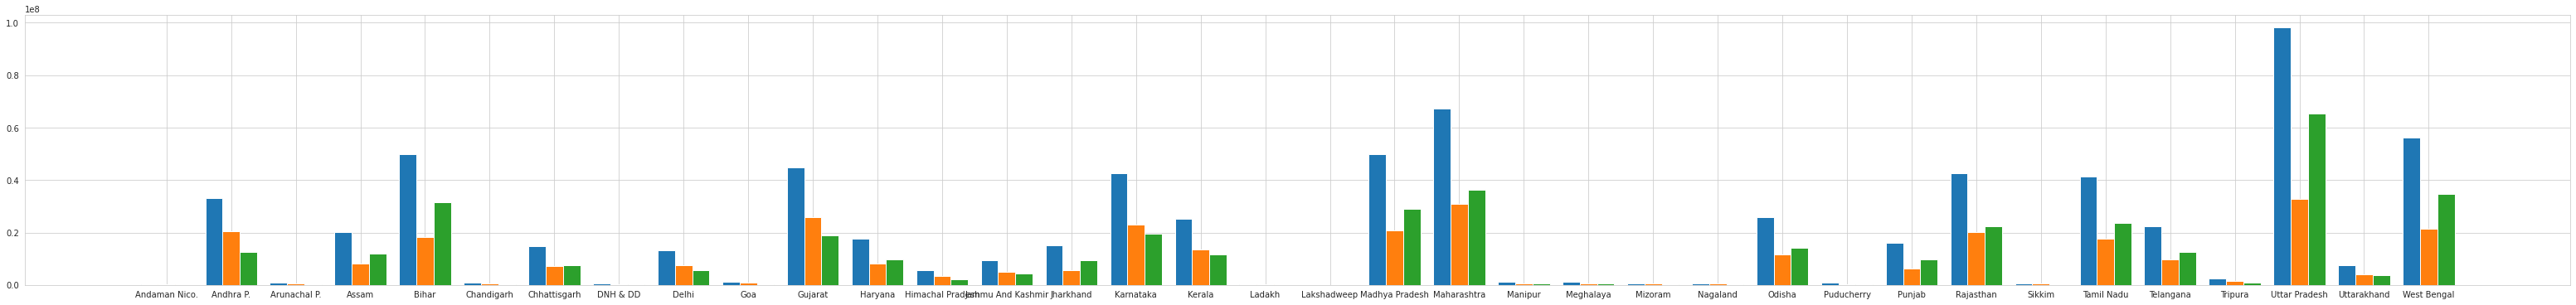

In [215]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.subplots(1,sharey="row",figsize=(55,6))

X = df.States
Y = df.First_Dose
Z = df.Second_Dose
ZZ = df["Second_Dose"] - df["First_Dose"]
df["net"] = df["First_Dose"] - df["Second_Dose"] 
YY = df.net

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    
subcategorybar(X, [Y,Z,YY])

plt.show()


**Click on the plot to view the MAGNIFIED version**


In the above plot each state is represting three bar plots 

*1 : First Doses of Vaccin Administered*

*2 : Second Dose of Vaccine Administered*

*3:  First Dose - Second Dose  [ More is the length of 3rd graph* ;more is the differnce in dose 2 and 1 

The Disadvantage with the above plot is that for few Sates which has less population ; for them Visualization got compressed.

So we will seperate out States based on their First Dose Performance ; Those States who has administered less than 30 lakh doses will be separated and reaming will be seperated out in different DataFrame

### Visualization for Smaller States & Finding Out which States are Performing well in Administering Doses at Equivalent Pace

In [198]:
df4 = df[(df['First_Dose']<3000000)]

In [199]:
df4.head(15)

,States,First_Dose,Second_Dose,net
0,Andaman Nico.,294001,200157,93844
2,Arunachal P.,771875,534486,237389
5,Chandigarh,926035,546981,379054
7,DNH & DD,660753,370255,290498
9,Goa,1262568,911114,351454
17,Ladakh,208798,152280,56518
18,Lakshadweep,55129,45951,9178
21,Manipur,1249436,719413,530023
22,Meghalaya,1103275,641819,461456
23,Mizoram,711597,512029,199568


In [200]:
df4.describe

<bound method NDFrame.describe of            States  First_Dose  Second_Dose     net
0   Andaman Nico.      294001       200157   93844
2    Arunachal P.      771875       534486  237389
5      Chandigarh      926035       546981  379054
7        DNH & DD      660753       370255  290498
9             Goa     1262568       911114  351454
17         Ladakh      208798       152280   56518
18    Lakshadweep       55129        45951    9178
21        Manipur     1249436       719413  530023
22      Meghalaya     1103275       641819  461456
23        Mizoram      711597       512029  199568
24       Nagaland      709553       490663  218890
26     Puducherry      733922       404355  329567
29         Sikkim      521763       451509   70254
32        Tripura     2508477      1621329  887148>

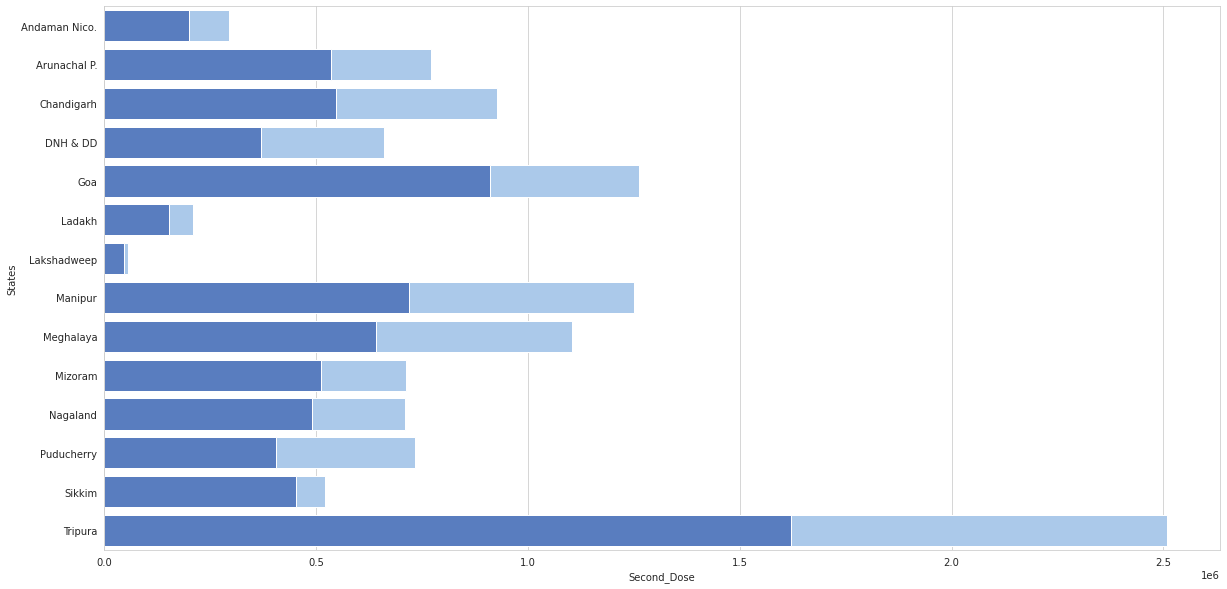

In [202]:
fig4, ax = plt.subplots(1,sharey="row",figsize=(20,10))
sns.set_color_codes("pastel")
sns.barplot(x="First_Dose", y="States", data=df4,
            label="Dose 1", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Second_Dose", y="States", data=df4,
            label="First_Dose", color="b")

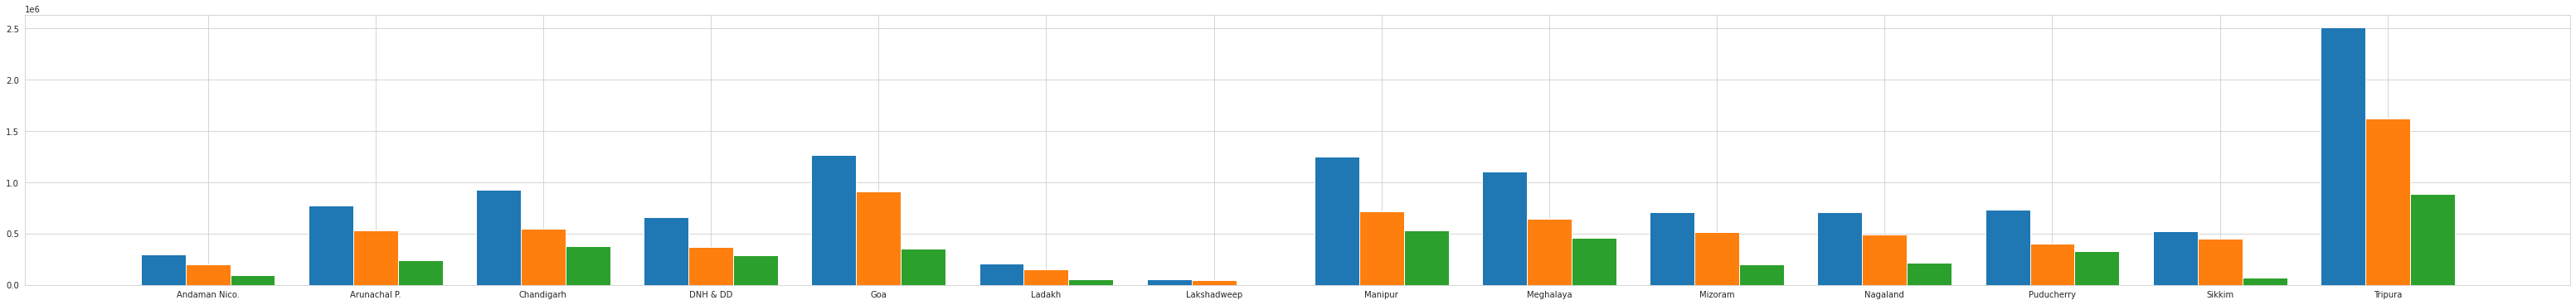

In [203]:
fig = plt.subplots(1,sharey="row",figsize=(55,6))

X = df4.States
Y = df4.First_Dose
Z = df4.Second_Dose
YY  = df4.net

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    
subcategorybar(X, [Y,Z,YY])

plt.show()

**From the above two plots it is evident that the States whose performance in administering both doses in equal pace are :**

1 Lakshyadweep

2 Sikkim

3 Ladhak

**And the States/Ut's which are not performing well on Admistering Dose 1 and 2 in Equivalent Pace are :**

1 Tripura

2 Dadra and Nagar Havelli

3 Puducherry

### Visualization for Bigger States & Finding Out which States are Performing well in Administering Doses at Equivalent Pace

In [216]:
df5 = df[(df['First_Dose']>3000000)]

In [217]:
df5.head()

,States,First_Dose,Second_Dose,net
1,Andhra P.,32976969,20375181,12601788
3,Assam,20172463,8068795,12103668
4,Bihar,49874828,18346781,31528047
6,Chhattisgarh,14851682,7343273,7508409
8,Delhi,13055636,7425404,5630232


In [218]:
df5.describe

<bound method NDFrame.describe of                States  First_Dose  Second_Dose       net
1           Andhra P.    32976969     20375181  12601788
3               Assam    20172463      8068795  12103668
4               Bihar    49874828     18346781  31528047
6        Chhattisgarh    14851682      7343273   7508409
8               Delhi    13055636      7425404   5630232
10            Gujarat    44735217     25972387  18762830
11            Haryana    17772376      8115463   9656913
12   Himachal Pradesh     5713695      3443823   2269872
13  Jammu And Kashmir     9511073      5149471   4361602
14          Jharkhand    14986646      5585648   9400998
15          Karnataka    42497761     22858384  19639377
16             Kerala    25306499     13658343  11648156
19     Madhya Pradesh    49911938     20838045  29073893
20        Maharashtra    67198794     30975692  36223102
25             Odisha    25736641     11560912  14175729
27             Punjab    15942714      6238973   97037

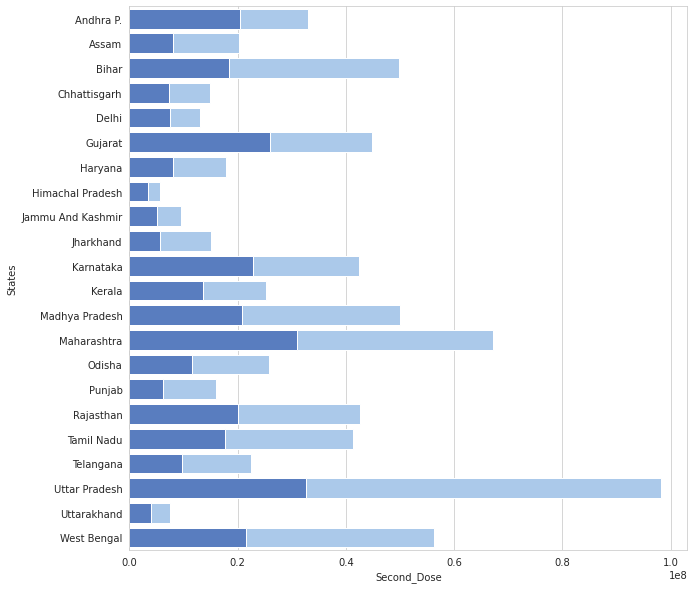

In [219]:
fig4, ax = plt.subplots(1,sharey="row",figsize=(10,10))
sns.set_color_codes("pastel")
sns.barplot(x="First_Dose", y="States", data=df5,
            label="Dose 1", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Second_Dose", y="States", data=df5,
            label="First_Dose", color="b")

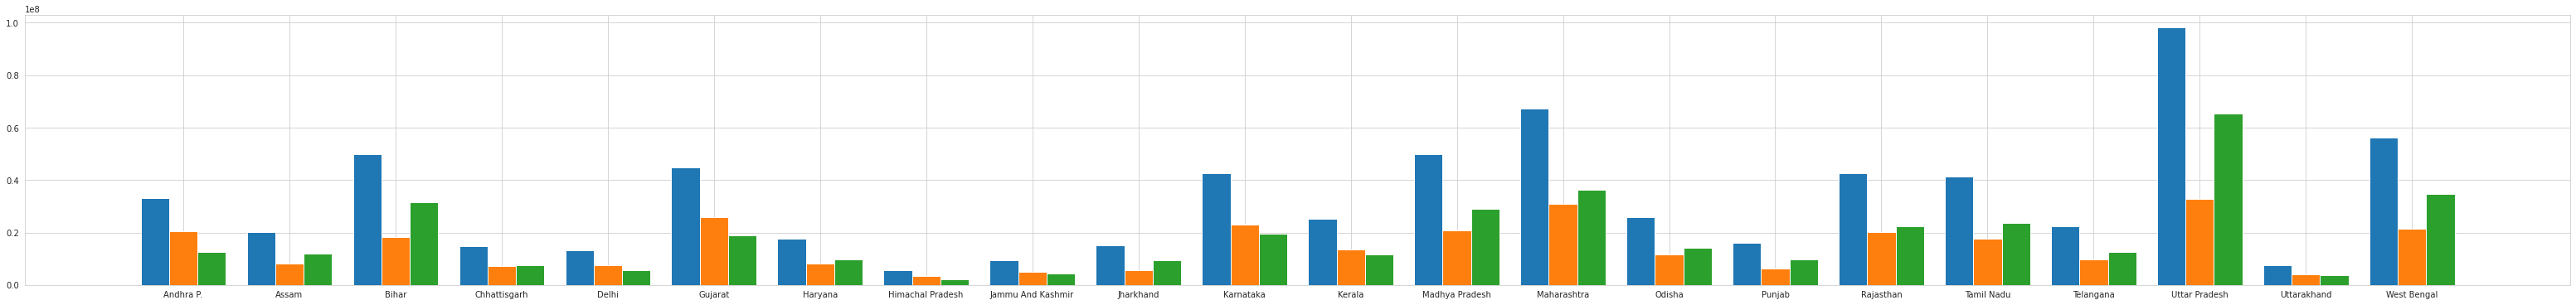

In [220]:
fig = plt.subplots(1,sharey="row",figsize=(55,6))

X = df5.States
Y = df5.First_Dose
Z = df5.Second_Dose
YY  = df5.net

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    
subcategorybar(X, [Y,Z,YY])

plt.show()

**From the above two plots it is evident that the States whose performance in administering both doses in equal pace are :**

1 Himachal Pradesh

2 Uttrakand

3 Jammu & Kashmir

4 New Delhi

**And the States/Ut's which are not performing well on Admistering Dose 1 and 2 in Equivalent Pace are :**

1 Uttar Pradesh

2 Bihar

3 West Bengal

*Overall its been observed that , the states having less population are doing really great in administering both doses at the same pace , where as States having more population their performane is pretty Bad*